<a href="https://colab.research.google.com/github/Thomas-Fabbris/parallel-computing-polimi/blob/main/PRAM/aapp_ispc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISPC examples using google colab

This notebook provides application examples to showcase the ISPC compiler. For each example it is possible to edit the kernel files and run the whole application. In most cases, it will report the kernel(s) execution time.

## The language

ISPC is a C-based language, with custom extensions. By default you can write code using C89 constructs. Please, refer to the documentation for the complete lists of extensions: [https://ispc.github.io/ispc.html](https://ispc.github.io/ispc.html)


## How to use it

All the example have the same structure: we use a simple Makefile to drive the compilation process. You can use the cells below to compile and run example. If you want to play, you can edit any source files in colab by clicking on the folder icon on the left toolbar.
> Before running any experiment, you need to set up the environment.

## Setup

These step are required to initialize the environment.

### Step 1 - Check the available CPU

All the examples in this colab assume that we have two cores with AVX2 capabilities. Please double-check that the hardware is still the same.

In [ ]:
!lscpu

Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   2
  On-line CPU(s) list:    0,1
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:           6
    Model:                79
    Thread(s) per core:   2
    Core(s) per socket:   1
    Socket(s):            1
    Stepping:             0
    BogoMIPS:             4399.99
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 cl
                          flush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc re
                          p_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3
                           fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand
                           hypervisor lahf_lm abm 3dnowprefetch i

### Step 2 - Prepare the environment

The following cell will download the ISPC compiler and the example source code.

In [ ]:
!if [ ! -d "ispc" ]; then wget https://github.com/ispc/ispc/releases/download/v1.21.0/ispc-v1.21.0-linux.tar.gz && tar -xf ispc-v1.21.0-linux.tar.gz && mv ispc-v1.21.0-linux ispc && rm ispc-v1.21.0-linux.tar.gz; fi
%env PATH = /content/ispc/bin/:opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin
!if [ ! -d "sinx" ]; then wget -O examples.tar.gz https://drive.google.com/uc?id=1ErE7RQVKSAkhkqIWzIb1eWKqV-IwiLE7 && tar -xf examples.tar.gz && rm examples.tar.gz; fi

env: PATH=/content/ispc/bin/:opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin
--2024-10-02 14:58:49--  https://drive.google.com/uc?id=1ErE7RQVKSAkhkqIWzIb1eWKqV-IwiLE7
Resolving drive.google.com (drive.google.com)... 108.177.96.113, 108.177.96.139, 108.177.96.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.96.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1ErE7RQVKSAkhkqIWzIb1eWKqV-IwiLE7 [following]
--2024-10-02 14:58:49--  https://drive.usercontent.google.com/download?id=1ErE7RQVKSAkhkqIWzIb1eWKqV-IwiLE7
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.18.132, 2a00:1450:4013:c18::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.18.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length:

This command will delete the source code of all the examples (if you want to start over again with your modifications). Use the previous cell to reinitialize the environment.

In [ ]:
!rm -rf count_gt4/ mandelbrot/ matmul/ sinx/ sinx_vec/

## sin(x) example

We compare the ISPC compiler vs a naive CPP implementation.

In [ ]:
!make -C /content/sinx clean
!make -C /content/sinx
!/content/sinx/main 2>&1

make: Entering directory '/content/sinx'
make: Leaving directory '/content/sinx'
make: Entering directory '/content/sinx'
	ISPC	kernel.ispc
	CXX	kernel_cpp.cpp
	CXX	main.cpp
	GEN	main
make: Leaving directory '/content/sinx'
[ function ispc::sinx took 9562391ns ]
[ function ispc::sinx took 3306556ns ]
[ function ispc::sinx took 3407743ns ]
[ function ispc::sinx took 3285360ns ]
[ function cpp::sinx took 26609473ns ]
[ function cpp::sinx took 27371553ns ]
[ function cpp::sinx took 25862921ns ]
[ function cpp::sinx took 22134322ns ]


Now we compare the ISPC compiler vs a CPP source with the loop unrolled to expose more directly to the compiler the optimization opportunities.

In [ ]:
!make -C /content/sinx_vec clean
!make -C /content/sinx_vec
!/content/sinx_vec/main 2>&1

make: Entering directory '/content/sinx_vec'
make: Leaving directory '/content/sinx_vec'
make: Entering directory '/content/sinx_vec'
	ISPC	kernel.ispc
	CXX	kernel_cpp.cpp
	CXX	main.cpp
	GEN	main
make: Leaving directory '/content/sinx_vec'
[ function ispc::sinx took 10038889ns ]
[ function ispc::sinx took 4218755ns ]
[ function ispc::sinx took 5992088ns ]
[ function ispc::sinx took 4367173ns ]
[ function cpp::sinx took 10814332ns ]
[ function cpp::sinx took 5363977ns ]
[ function cpp::sinx took 5382251ns ]
[ function cpp::sinx took 5388243ns ]


## Count elements example

We write a program that counts how many elements in a vector are greater than a threshold. A first implementation uses low-level primitives to communicate between the program instances. While a second implementation uses the high-level interface to perform the reduction.

In [ ]:
!make -C /content/count_gt4 clean
!make -C /content/count_gt4
!/content/count_gt4/main 2>&1

make: Entering directory '/content/count_gt4'
make: Leaving directory '/content/count_gt4'
make: Entering directory '/content/count_gt4'
	ISPC	kernel_shuffle.ispc
	ISPC	kernel_reduce.ispc
	CXX	main.cpp
	GEN	main
make: Leaving directory '/content/count_gt4'
[ function ispc::count_greater_than_shuffle took 992416ns ]
[ function ispc::count_greater_than_shuffle took 3791047ns ]
[ function ispc::count_greater_than_shuffle took 1163906ns ]
[ function ispc::count_greater_than_shuffle took 1031086ns ]
[ function ispc::count_greater_than_reduce took 1011153ns ]
[ function ispc::count_greater_than_reduce took 833599ns ]
[ function ispc::count_greater_than_reduce took 815971ns ]
[ function ispc::count_greater_than_reduce took 779320ns ]


> Prefer the high-level reduction usage. Fallback to the low-level primitives to implement custom communications.

## Matrix multiplication example

With this example, we introduce *tasks*. We compare a first serial version of matrix multiplication against one that can scale across the available CPUs. We use the file `/content/ispc/examples/common/tasksys.cpp` to map tasks with system threads.

In [ ]:
!make -C /content/matmul clean
!make -C /content/matmul
!/content/matmul/main 2>&1

## Mandelbrot example

Let's try to apply all the concepts that we have seen previously with a more fun application: draw the mandelbrot set. This first command will generate the output images using the different kernels.

In [ ]:
!make -C /content/mandelbrot clean
!make -C /content/mandelbrot
!/content/mandelbrot/main 2>&1

make: Entering directory '/content/mandelbrot'
make: Leaving directory '/content/mandelbrot'
make: Entering directory '/content/mandelbrot'
	ISPC	kernel_serial.ispc
	ISPC	kernel_task.ispc
	CXX	tasksys.cpp
	CXX	kernel_cpp.cpp
	CXX	main.cpp
	GEN	main
make: Leaving directory '/content/mandelbrot'
[ function cpp::mandelbrot took 129627070ns ]
[ function cpp::mandelbrot took 128568638ns ]
[ function cpp::mandelbrot took 129307563ns ]
[ function ispc::mandelbrot took 31381227ns ]
[ function ispc::mandelbrot took 30955843ns ]
[ function ispc::mandelbrot took 31020696ns ]
[ function ispc::mandelbrot_task took 18790603ns ]
[ function ispc::mandelbrot_task took 17929479ns ]
[ function ispc::mandelbrot_task took 17695183ns ]


This command will display the image generated with the cpp kernel.

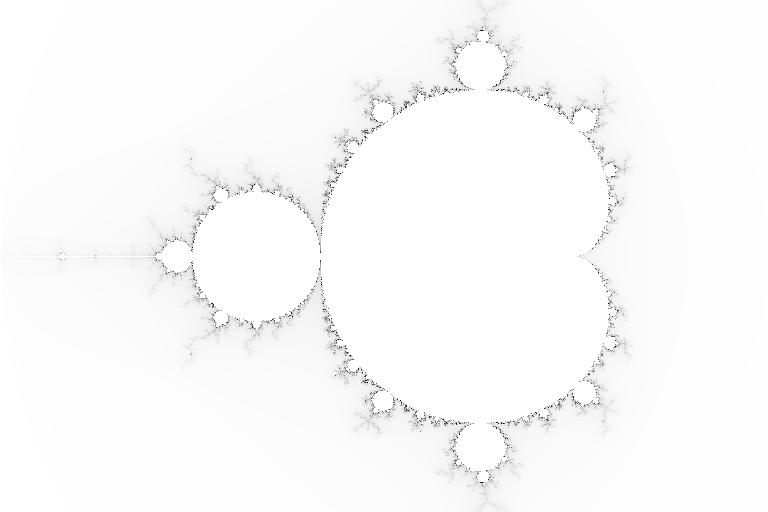

In [ ]:
from PIL import Image
from IPython.display import display
display(Image.open("/content/mandelbrot_cpp.ppm"))
